In [2]:
import cmocean.cm as cmo
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import scipy.spatial


ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

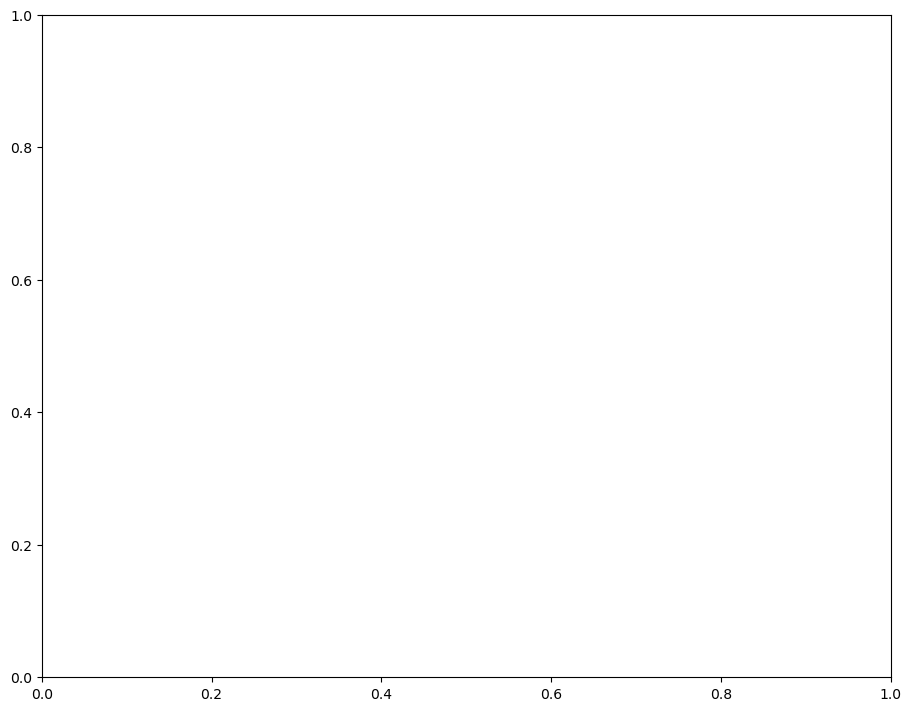

In [5]:

cruise = '21SU'

if cruise == '21SU':
    index = '1'
elif cruise == '21FA':
    index = '2'
elif cruise == '22SP':
    index = '3'
elif cruise == '22SU':
    index = '4'

cfile = '/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/'+index+'GOM'+cruise+'_MODIS_L2_aCDOM.nc'

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, ax = plt.subplots(constrained_layout=True, figsize=(9, 7))
        

ds = xr.open_dataset(cfile)
data = ds.aCDOM300.mean('time')

im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=10, 
                              x='lon', y='lat', 
                              add_colorbar=False,
                             transform=ccrs.PlateCarree(),
                             cmap=cmo.matter)

ckdtree = scipy.spatial.cKDTree(im)
        
        
def closest_point_coords(ckdtree, x, y):
    # returns coordinates of closest point
    return ckdtree.data[closest_point_id(ckdtree, x, y)]
        